In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse

from sklearn.preprocessing import LabelEncoder

import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from mlxtend.plotting import plot_confusion_matrix
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split,GridSearchCV

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('secondary_data.csv', sep = ';') # вчитување на фајл
df

class  cap-diameter cap-shape cap-surface cap-color  \
0         p         15.26         x           g         o   
1         p         16.60         x           g         o   
2         p         14.07         x           g         o   
3         p         14.17         f           h         e   
4         p         14.64         x           h         o   
...     ...           ...       ...         ...       ...   
61064     p          1.18         s           s         y   
61065     p          1.27         f           s         y   
61066     p          1.27         s           s         y   
61067     p          1.24         f           s         y   
61068     p          1.17         s           s         y   

      does-bruise-or-bleed gill-attachment gill-spacing gill-color  \
0                        f               e          NaN          w   
1                        f               e          NaN          w   
2                        f               e          NaN          w   
3                        f               e          NaN          w   
4                        f               e          NaN          w   
...                    ...             ...          ...        ...   
61064                    f               f            f          f   
61065                    f               f            f          f   
61066                    f               f            f          f   
61067                    f               f            f          f   
61068                    f               f            f          f   

       stem-height  ...  stem-root stem-surface stem-color veil-type  \
0            16.95  ...          s            y          w         u   
1            17.99  ...          s            y          w         u   
2            17.80  ...          s            y          w         u   
3            15.77  ...          s            y          w         u   
4            16.53  ...          s            y          w         u   
...            ...  ...        ...          ...        ...       ...   
61064         3.93  ...        NaN          NaN          y       NaN   
61065         3.18  ...        NaN          NaN          y       NaN   
61066         3.86  ...        NaN          NaN          y       NaN   
61067         3.56  ...        NaN          NaN          y       NaN   
61068         3.25  ...        NaN          NaN          y       NaN   

      veil-color has-ring ring-type spore-print-color habitat season  
0              w        t         g               NaN       d      w  
1              w        t         g               NaN       d      u  
2              w        t         g               NaN       d      w  
3              w        t         p               NaN       d      w  
4              w        t         p               NaN       d      w  
...          ...      ...       ...               ...     ...    ...  
61064        NaN        f         f               NaN       d      a  
61065        NaN        f         f               NaN       d      a  
61066        NaN        f         f               NaN       d      u  
61067        NaN        f         f               NaN       d      u  
61068        NaN        f         f               NaN       d      u  

[61069 rows x 21 columns]

## 1. Data Preprocessing

## 1.1. Descriptive Statistics

In [3]:
df.shape

(61069, 21)

In [4]:
df.columns

Index(['class', 'cap-diameter', 'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
       'stem-height', 'stem-width', 'stem-root', 'stem-surface', 'stem-color',
       'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color',
       'habitat', 'season'],
      dtype='object')

**This function displays the number of rows and columns in the DataFrame - (rows, columns), so we can see that there are 8124 instaces and 22 features and one target variable, class, where we can see if the mashroom is poisonous or not.**

In [5]:
df.head()

class  cap-diameter cap-shape cap-surface cap-color does-bruise-or-bleed  \
0     p         15.26         x           g         o                    f   
1     p         16.60         x           g         o                    f   
2     p         14.07         x           g         o                    f   
3     p         14.17         f           h         e                    f   
4     p         14.64         x           h         o                    f   

  gill-attachment gill-spacing gill-color  stem-height  ...  stem-root  \
0               e          NaN          w        16.95  ...          s   
1               e          NaN          w        17.99  ...          s   
2               e          NaN          w        17.80  ...          s   
3               e          NaN          w        15.77  ...          s   
4               e          NaN          w        16.53  ...          s   

  stem-surface stem-color veil-type veil-color has-ring ring-type  \
0            y          w         u          w        t         g   
1            y          w         u          w        t         g   
2            y          w         u          w        t         g   
3            y          w         u          w        t         p   
4            y          w         u          w        t         p   

  spore-print-color habitat season  
0               NaN       d      w  
1               NaN       d      u  
2               NaN       d      w  
3               NaN       d      w  
4               NaN       d      w  

[5 rows x 21 columns]

In [6]:
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil-color         

In [7]:
df.nunique()

class                      2
cap-diameter            2571
cap-shape                  7
cap-surface               11
cap-color                 12
does-bruise-or-bleed       2
gill-attachment            7
gill-spacing               3
gill-color                12
stem-height             2226
stem-width              4630
stem-root                  5
stem-surface               8
stem-color                13
veil-type                  1
veil-color                 6
has-ring                   2
ring-type                  8
spore-print-color          7
habitat                    8
season                     4
dtype: int64

**With this function we detect the number of unique values in a column. We can see that veil-type has only one value, so it doesn't give us enough information. Then we can drop that column.**

In [8]:
df = df.drop('veil-type', axis = 1)

In [9]:
df.columns

Index(['class', 'cap-diameter', 'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
       'stem-height', 'stem-width', 'stem-root', 'stem-surface', 'stem-color',
       'veil-color', 'has-ring', 'ring-type', 'spore-print-color', 'habitat',
       'season'],
      dtype='object')

## 1.2 Handling Missing Values

In [10]:
df.isna().sum()

class                       0
cap-diameter                0
cap-shape                   0
cap-surface             14120
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          9884
gill-spacing            25063
gill-color                  0
stem-height                 0
stem-width                  0
stem-root               51538
stem-surface            38124
stem-color                  0
veil-color              53656
has-ring                    0
ring-type                2471
spore-print-color       54715
habitat                     0
season                      0
dtype: int64

**The features that contain more then 25000 missing values will be dropped.**

In [11]:
columns_to_drop = ['stem-root', 'stem-surface', 'veil-color', 'spore-print-color', 
                   'gill-spacing']

df = df.drop(columns=columns_to_drop)

In [12]:
df.columns

Index(['class', 'cap-diameter', 'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-color', 'stem-height',
       'stem-width', 'stem-color', 'has-ring', 'ring-type', 'habitat',
       'season'],
      dtype='object')

In [13]:
df.shape

(61069, 15)

**As we can see cap-surface has also got quite a lot of missiing values, so we will drop it. Although gill-attachment has missing values, it has 16.2% missing values which is not a lot, therefor we will drop only the instances(rows) with missing values in that feature.**

In [14]:
df = df.drop('cap-surface', axis = 1)
df = df.dropna(subset=['gill-attachment'])

In [15]:
df.shape

(51185, 14)

**The last feature that contains missing values is ring-type, since it only has 2471 missing values we will handle them by imputing with the most frequent value.**

In [16]:
most_frequent_ring_type = df['ring-type'].mode()[0]
df['ring-type'].fillna(most_frequent_ring_type, inplace=True)

In [17]:
df.isna().sum()

class                   0
cap-diameter            0
cap-shape               0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-color              0
stem-height             0
stem-width              0
stem-color              0
has-ring                0
ring-type               0
habitat                 0
season                  0
dtype: int64

## 1.3 Encoding The Data

**Categorical feature columns often have multiple categories. For example, cap-shape might have categories like ['bell', 'conical', 'convex', 'flat', 'sunken', 'bell'].
    One-hot encoding transforms each category into a binary column. For instance, if cap-shape has 6 unique categories, it will be transformed into 6 binary columns where only one column will have a 1 for each observation, and the others will be 0.
    This encoding prevents the model from misinterpreting the encoded values as ordinal. For example, if you used LabelEncoder on cap-shape, you might end up with integers [0, 1, 2, 3, 4, 5], and some models could incorrectly infer that higher values have a stronger or different effect, which is not true for categorical data.
    One-hot encoding is essential to ensure that the machine learning model treats each category as an independent feature without implying any sort of order or hierarchy.**

**Label Encoding encoding is suitable for the target variable because it transforms the classes into a format that many machine learning algorithms can directly work with (i.e., numerical format).
Importantly, label encoding is used here because the model will not interpret the numerical labels as having any ordinal relationship (i.e., it will not assume that one class is greater or less than another).**

In [18]:
le = LabelEncoder()
df['class'] = le.fit_transform(df['class'])

In [19]:
columns_to_encode = ['cap-shape','cap-color',
       'does-bruise-or-bleed','gill-color',
       'stem-color', 'gill-attachment',
       'has-ring', 'ring-type',
       'habitat', 'season']

df = pd.get_dummies(df, columns = columns_to_encode)
df

class  cap-diameter  stem-height  stem-width  cap-shape_b  cap-shape_c  \
0          1         15.26        16.95       17.09        False        False   
1          1         16.60        17.99       18.19        False        False   
2          1         14.07        17.80       17.74        False        False   
3          1         14.17        15.77       15.98        False        False   
4          1         14.64        16.53       17.20        False        False   
...      ...           ...          ...         ...          ...          ...   
61064      1          1.18         3.93        6.22        False        False   
61065      1          1.27         3.18        5.43        False        False   
61066      1          1.27         3.86        6.37        False        False   
61067      1          1.24         3.56        5.44        False        False   
61068      1          1.17         3.25        5.45        False        False   

       cap-shape_f  cap-shape_o  cap-shape_p  cap-shape_s  ...  habitat_h  \
0            False        False        False        False  ...      False   
1            False        False        False        False  ...      False   
2            False        False        False        False  ...      False   
3             True        False        False        False  ...      False   
4            False        False        False        False  ...      False   
...            ...          ...          ...          ...  ...        ...   
61064        False        False        False         True  ...      False   
61065         True        False        False        False  ...      False   
61066        False        False        False         True  ...      False   
61067         True        False        False        False  ...      False   
61068        False        False        False         True  ...      False   

       habitat_l  habitat_m  habitat_p  habitat_u  habitat_w  season_a  \
0          False      False      False      False      False     False   
1          False      False      False      False      False     False   
2          False      False      False      False      False     False   
3          False      False      False      False      False     False   
4          False      False      False      False      False     False   
...          ...        ...        ...        ...        ...       ...   
61064      False      False      False      False      False      True   
61065      False      False      False      False      False      True   
61066      False      False      False      False      False     False   
61067      False      False      False      False      False     False   
61068      False      False      False      False      False     False   

       season_s  season_u  season_w  
0         False     False      True  
1         False      True     False  
2         False     False      True  
3         False     False      True  
4         False     False      True  
...         ...       ...       ...  
61064     False     False     False  
61065     False     False     False  
61066     False      True     False  
61067     False      True     False  
61068     False      True     False  

[51185 rows x 78 columns]

In [20]:
df.columns

Index(['class', 'cap-diameter', 'stem-height', 'stem-width', 'cap-shape_b',
       'cap-shape_c', 'cap-shape_f', 'cap-shape_o', 'cap-shape_p',
       'cap-shape_s', 'cap-shape_x', 'cap-color_b', 'cap-color_e',
       'cap-color_g', 'cap-color_k', 'cap-color_l', 'cap-color_n',
       'cap-color_o', 'cap-color_p', 'cap-color_r', 'cap-color_u',
       'cap-color_w', 'cap-color_y', 'does-bruise-or-bleed_f',
       'does-bruise-or-bleed_t', 'gill-color_b', 'gill-color_e',
       'gill-color_f', 'gill-color_g', 'gill-color_k', 'gill-color_n',
       'gill-color_o', 'gill-color_p', 'gill-color_r', 'gill-color_u',
       'gill-color_w', 'gill-color_y', 'stem-color_b', 'stem-color_e',
       'stem-color_f', 'stem-color_g', 'stem-color_k', 'stem-color_l',
       'stem-color_n', 'stem-color_o', 'stem-color_p', 'stem-color_r',
       'stem-color_u', 'stem-color_w', 'stem-color_y', 'gill-attachment_a',
       'gill-attachment_d', 'gill-attachment_e', 'gill-attachment_f',
       'gill-attachment_p',

## 1.4 Feature Engineering

In [21]:
list = []
for (p,l,z,g) in zip(df['ring-type_p'],df['ring-type_l'],df['ring-type_z'],df['ring-type_g']):
    if p == True or l == True or z == True or g == True:
        list.append(1)
    else:
        list.append(0)
df['ring-stability'] = list

In [22]:
df['ring-stability'].unique()

array([1, 0])

In [23]:
# Replace zero values in 'stem-height' column with a small non-zero value
min_nonzero_height = df[df['stem-height'] > 0]['stem-height'].min()
df['stem-height'] = df['stem-height'].replace(0, min_nonzero_height)

# Calculate stem ratio
df['stem-ratio'] = df['stem-width'] / df['stem-height']

In [24]:
df['stem-diameter'] = (df['stem-width'] + df['stem-height'])/2

**Ratio of Stem Width to Stem Height: This ratio could potentially indicate different mushroom species or growth patterns associated with toxicity. A skewed or unusual ratio might suggest toxicity, but again, this might vary among species.**

**Stem Diameter: Poisonous mushrooms might have thicker or thinner stems compared to non-poisonous ones due to different structural requirements or evolutionary adaptations. However, this correlation might not be strong or consistent across all species.**

**Stable ring types are typically more substantial and durable, often persisting as the mushroom matures and sometimes even remaining attached to the stem or leaving a remnant or scar. Unstable ring types, on the other hand, are usually delicate and ephemeral, often disappearing or disintegrating relatively quickly after the mushroom matures.**

**Here's a general categorization based on stability:**

**Stable Ring Types:**

    Grooved
    Large
    Pendant
    Sheathing
    Zone

**Unstable Ring Types:**

    Cobwebby
    Evanescent
    Flaring
    Scaly
    Moveable

## 1.5 Standardization

In [25]:
col_num = ['cap-diameter', 'stem-height', 'stem-width', 'stem-ratio', 'stem-diameter']
df_new = pd.DataFrame()
for i in col_num:
    df_new[i] = df[i]
df_new

cap-diameter  stem-height  stem-width  stem-ratio  stem-diameter
0             15.26        16.95       17.09    1.008260         17.020
1             16.60        17.99       18.19    1.011117         18.090
2             14.07        17.80       17.74    0.996629         17.770
3             14.17        15.77       15.98    1.013316         15.875
4             14.64        16.53       17.20    1.040532         16.865
...             ...          ...         ...         ...            ...
61064          1.18         3.93        6.22    1.582697          5.075
61065          1.27         3.18        5.43    1.707547          4.305
61066          1.27         3.86        6.37    1.650259          5.115
61067          1.24         3.56        5.44    1.528090          4.500
61068          1.17         3.25        5.45    1.676923          4.350

[51185 rows x 5 columns]

In [26]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_new)
df_scaled

array([[ 1.51138891,  3.48600597,  0.41897961, -0.67336925,  1.22465089],
       [ 1.75800303,  3.83422409,  0.52515973, -0.67137606,  1.40230558],
       [ 1.29238084,  3.77060732,  0.4817224 , -0.6814812 ,  1.3491752 ],
       ...,
       [-1.06333615, -0.89685476, -0.61579393, -0.22558758, -0.75196503],
       [-1.06885736, -0.99730229, -0.7055644 , -0.31079811, -0.85407497],
       [-1.08174019, -1.10109808, -0.70459912, -0.20698997, -0.87897983]])

In [27]:
df['cap-diameter-sc'] = df_scaled[:,0]
df['stem-height-sc'] = df_scaled[:,1]
df['stem-width-sc'] = df_scaled[:,2]
df['stem-ratio-sc'] = df_scaled[:,3]
df['stem-diameter-sc'] = df_scaled[:,4]

In [28]:
df.shape

(51185, 86)

In [29]:
df = df.drop(col_num,axis=1)

**Standardization is a statistical technique used in data preprocessing to make different variables more comparable. It’s like translating all these different data “languages” into one universal dialect.**
**unstandardized data can lead to incorrect analyses.**

## 2. Vizualisation

In [30]:
df_corr = pd.DataFrame()
df_corr['cap-diameter-sc'] = df['cap-diameter-sc']
df_corr['stem-height-sc'] = df['stem-height-sc']
df_corr['stem-width-sc'] = df['stem-width-sc']
df_corr['stem-ratio-sc'] = df['stem-ratio-sc']
df_corr['stem-diameter-sc'] = df['stem-diameter-sc']
df_corr['class'] = df['class']

In [31]:
df_corr

cap-diameter-sc  stem-height-sc  stem-width-sc  stem-ratio-sc  \
0             1.511389        3.486006       0.418980      -0.673369   
1             1.758003        3.834224       0.525160      -0.671376   
2             1.292381        3.770607       0.481722      -0.681481   
3             1.310785        3.090912       0.311834      -0.669842   
4             1.397284        3.345379       0.429598      -0.650860   
...                ...             ...            ...            ...   
61064        -1.079900       -0.873417      -0.630273      -0.272711   
61065        -1.063336       -1.124536      -0.706530      -0.185630   
61066        -1.063336       -0.896855      -0.615794      -0.225588   
61067        -1.068857       -0.997302      -0.705564      -0.310798   
61068        -1.081740       -1.101098      -0.704599      -0.206990   

       stem-diameter-sc  class  
0              1.224651      1  
1              1.402306      1  
2              1.349175      1  
3              1.034544      1  
4              1.198916      1  
...                 ...    ...  
61064         -0.758606      1  
61065         -0.886451      1  
61066         -0.751965      1  
61067         -0.854075      1  
61068         -0.878980      1  

[51185 rows x 6 columns]

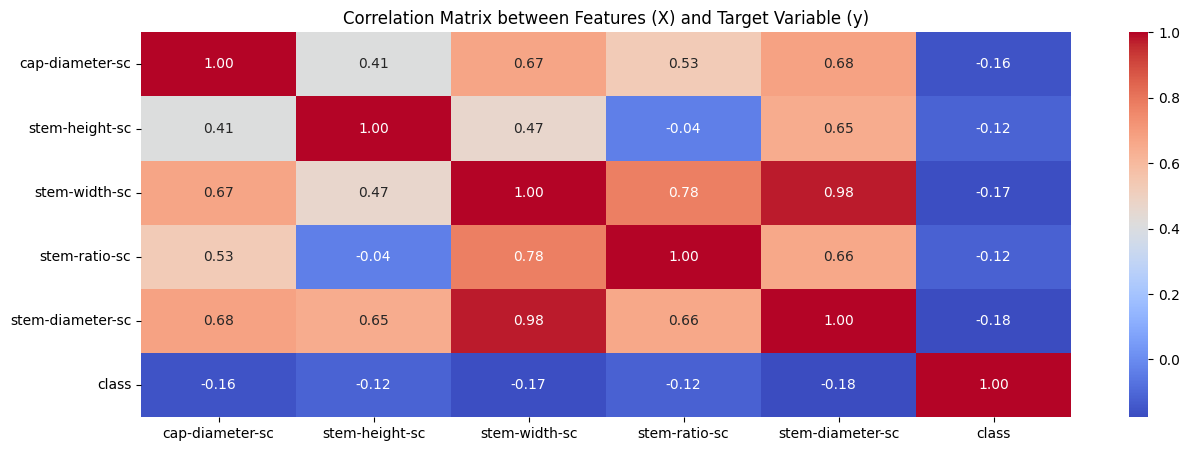

In [32]:
corr_matrix = df_corr.corr()
corr_matrix
plt.figure(figsize=(15, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix between Features (X) and Target Variable (y)')
plt.show()


**For the correlation matrix we used only the features with numeric values and we can see that the target variable has low correlation with each of these features**

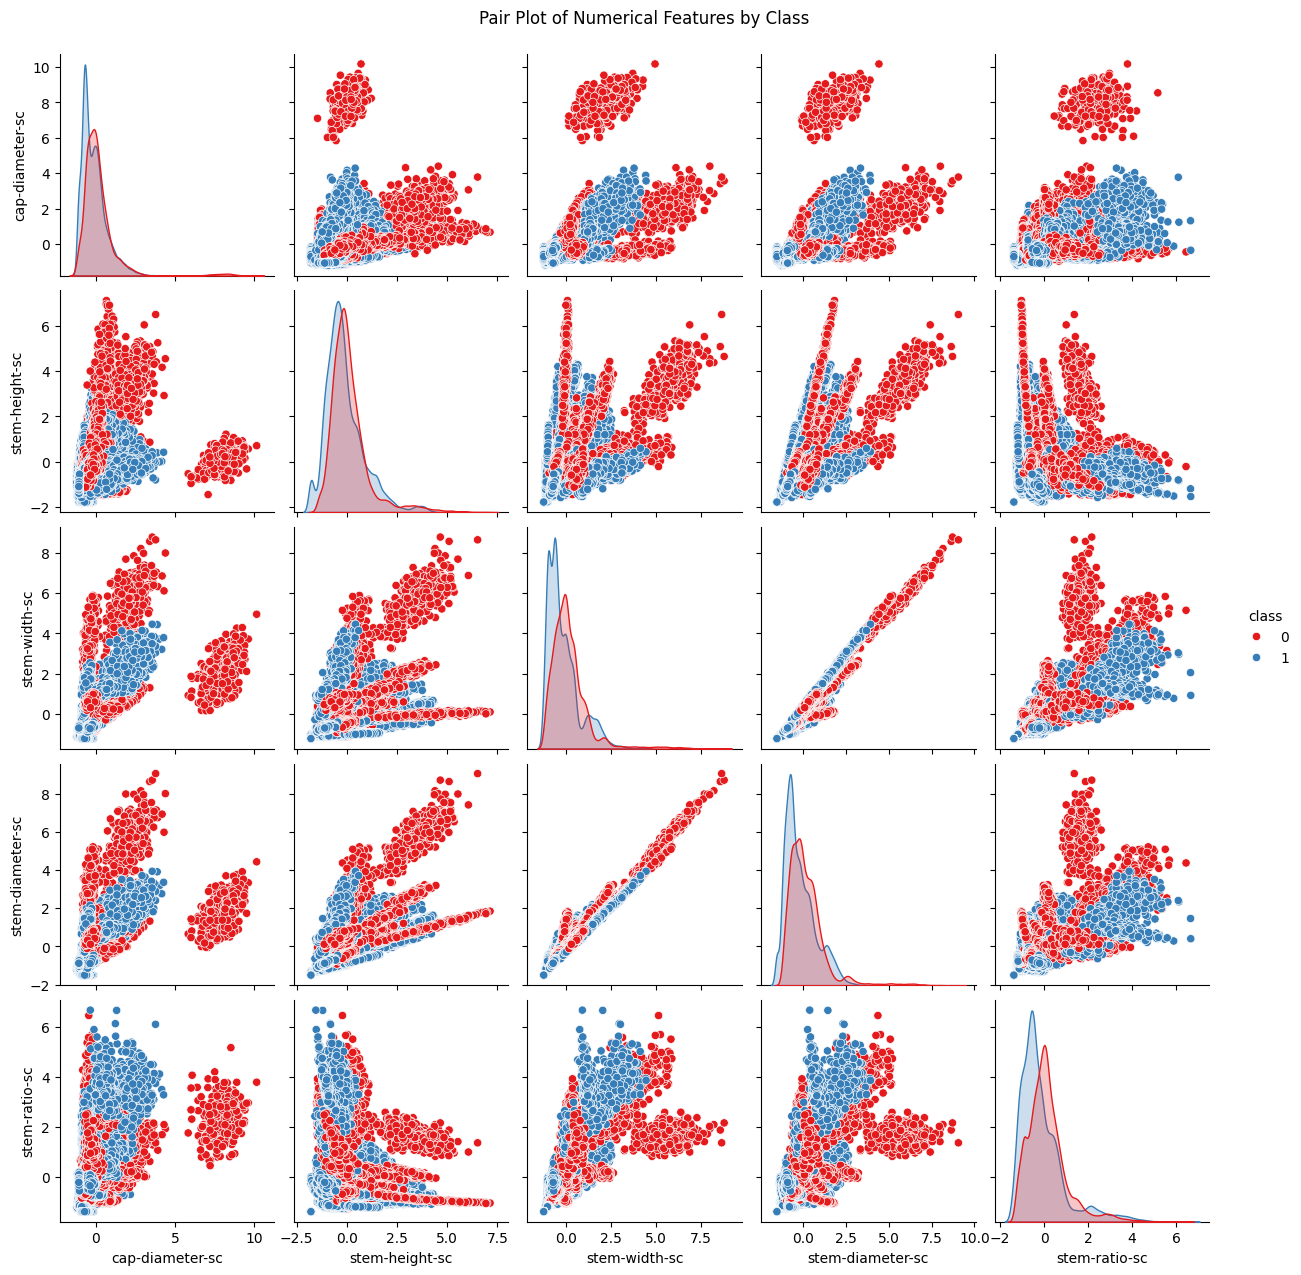

In [33]:
sns.pairplot(df[['cap-diameter-sc', 'stem-height-sc', 'stem-width-sc', 'stem-diameter-sc', 'stem-ratio-sc', 'class']], hue='class', palette='Set1')
plt.suptitle('Pair Plot of Numerical Features by Class', y=1.02)
plt.show()

**From the pair plots we can see that some of the features have outliers, to confirm that we will check the boxplots for each numerical feature.**

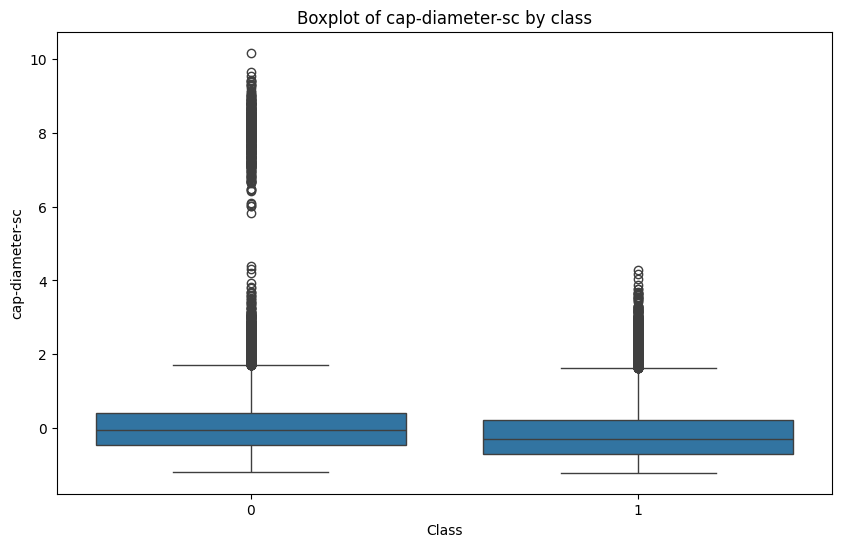

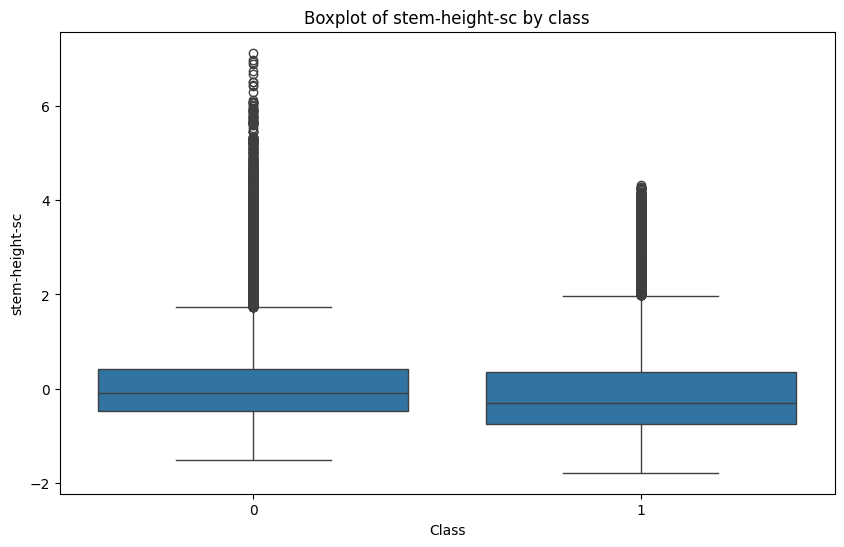

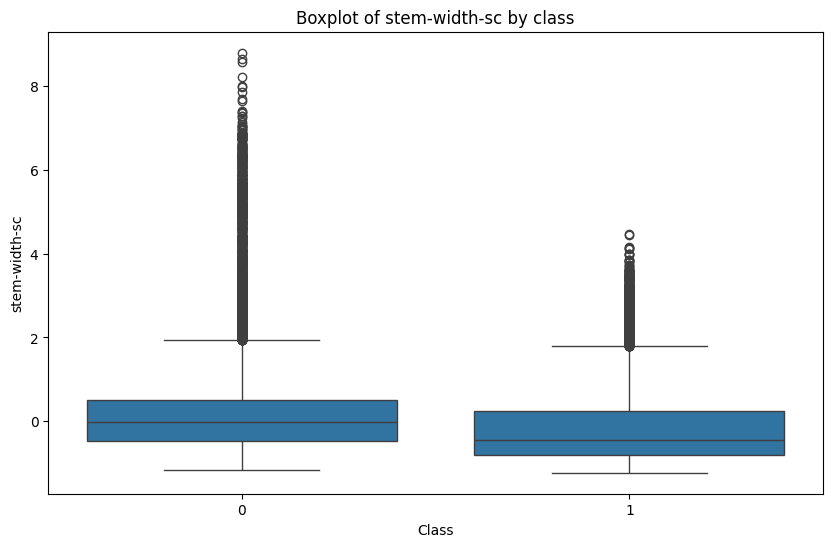

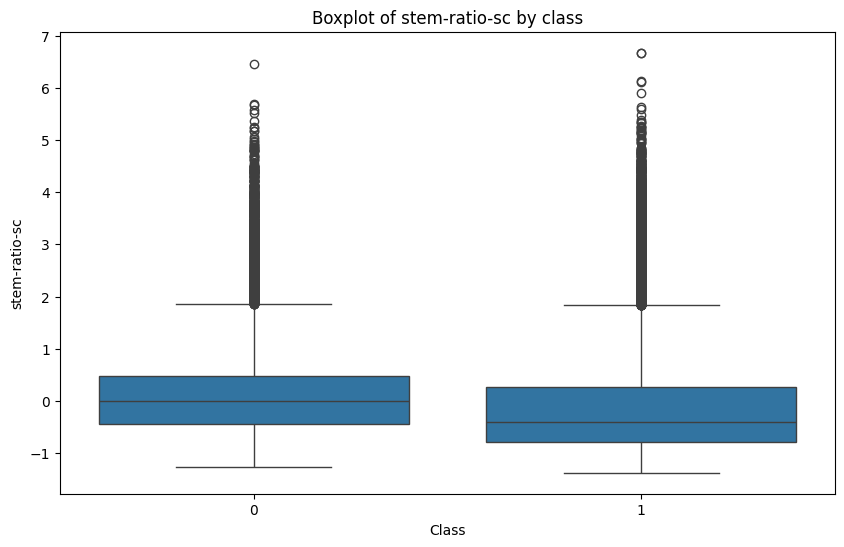

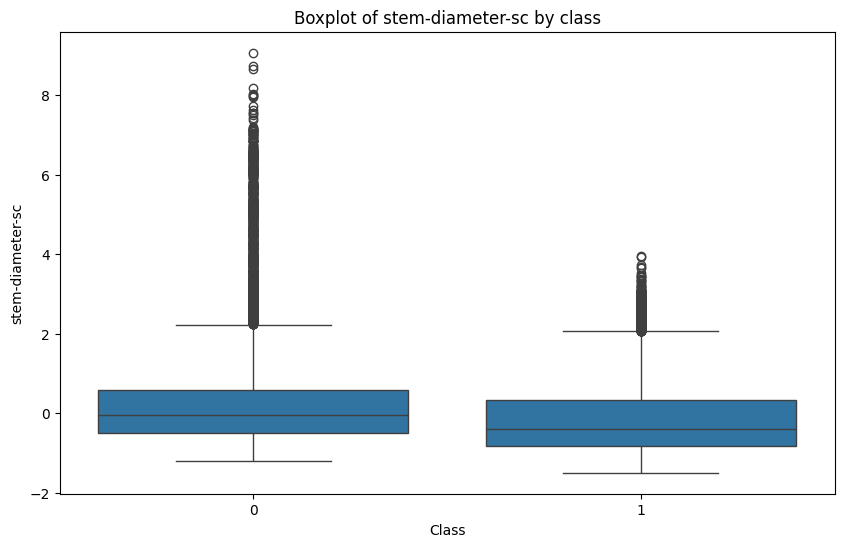

In [34]:
columns_to_plot = ['cap-diameter-sc', 'stem-height-sc', 'stem-width-sc', 'stem-ratio-sc', 'stem-diameter-sc']
for column in columns_to_plot:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='class', y=column, data=df)
    plt.title(f'Boxplot of {column} by class')
    plt.xlabel('Class')
    plt.ylabel(column)
    plt.show()

In [35]:
def count_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return ((series < lower_bound) | (series > upper_bound)).sum()
    
columns_to_check = ['cap-diameter-sc', 'stem-height-sc', 'stem-width-sc', 'stem-ratio-sc', 'stem-diameter-sc']

outlier_counts = {column: count_outliers(df[column]) for column in columns_to_check}

for column, count in outlier_counts.items():
    print(f'Number of outliers in {column}: {count}')

Number of outliers in cap-diameter-sc: 2119
Number of outliers in stem-height-sc: 2570
Number of outliers in stem-width-sc: 2089
Number of outliers in stem-ratio-sc: 2936
Number of outliers in stem-diameter-sc: 1420


**As we can see there are quite a lot of outliers, therefor we will handle them using winsorize.**

Number of outliers in cap-diameter-sc: 0
Number of outliers in stem-height-sc: 0
Number of outliers in stem-width-sc: 0
Number of outliers in stem-ratio-sc: 0
Number of outliers in stem-diameter-sc: 0


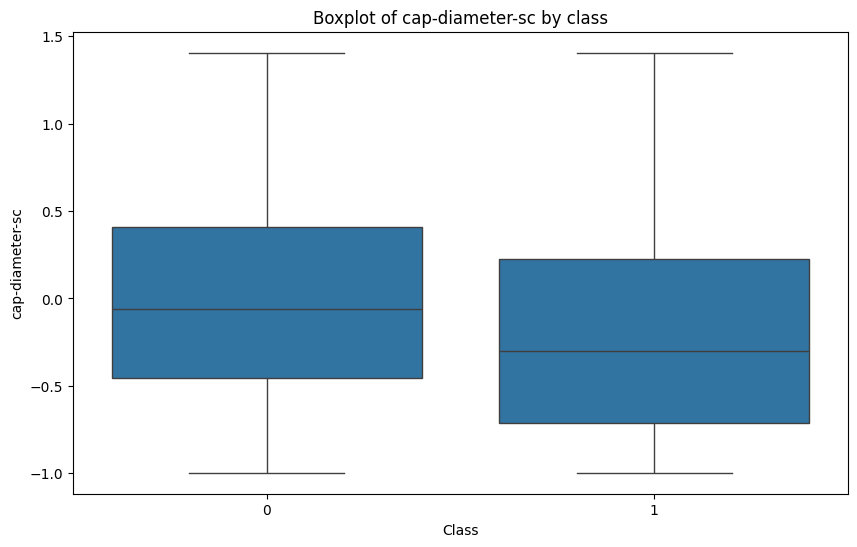

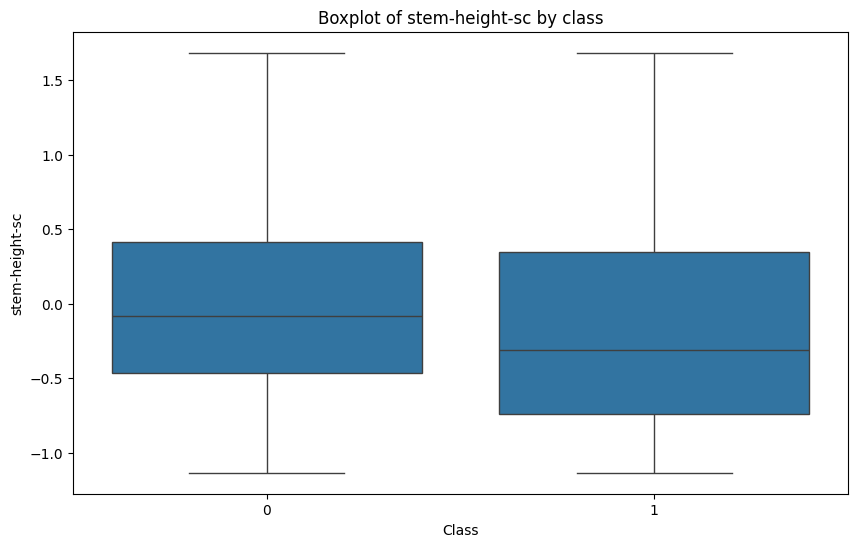

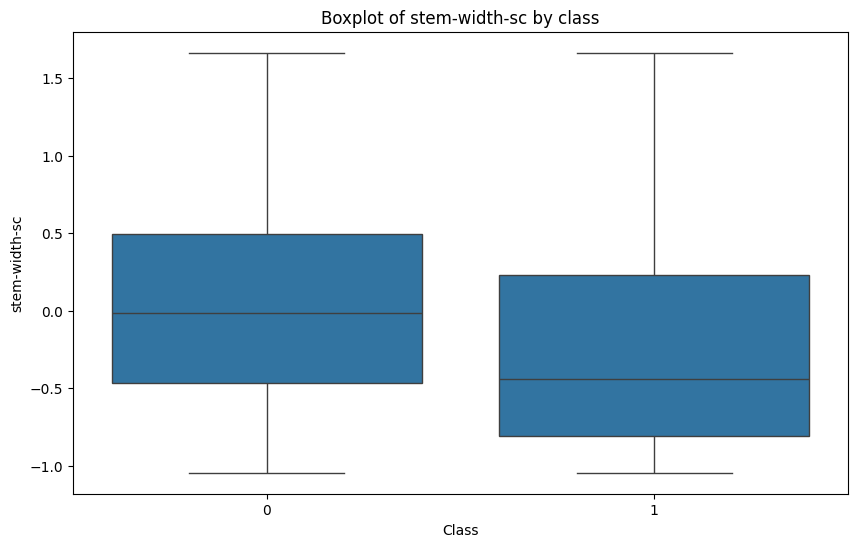

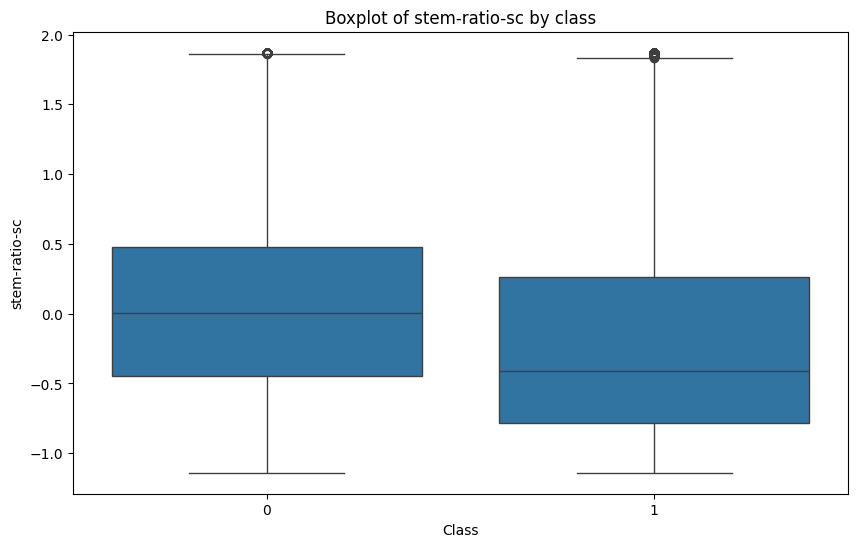

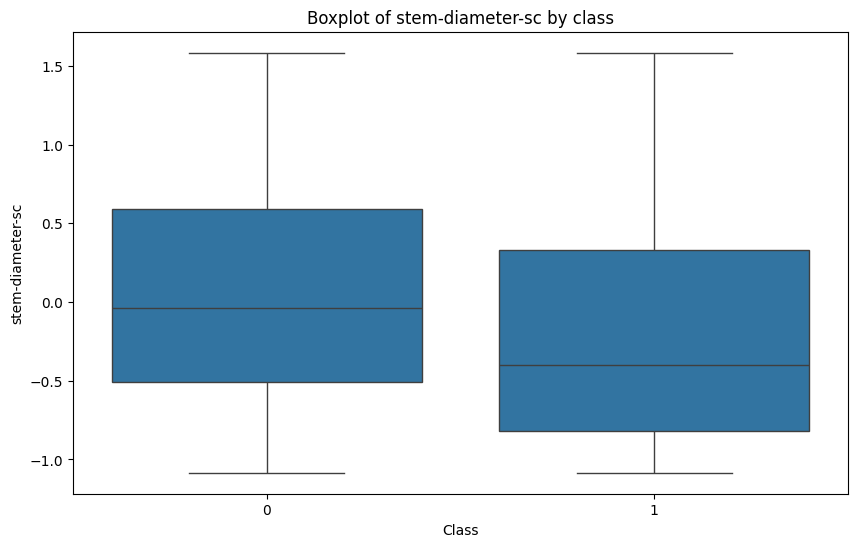

In [36]:
columns_to_plot = ['cap-diameter-sc', 'stem-height-sc', 'stem-width-sc', 'stem-ratio-sc', 'stem-diameter-sc']
from scipy.stats.mstats import winsorize
for column in columns_to_plot:
     df[column] = winsorize(df[column], limits=[0.06, 0.06])


outlier_counts = {column: count_outliers(df[column]) for column in columns_to_plot}

for column, count in outlier_counts.items():
    print(f'Number of outliers in {column}: {count}')
    
for column in columns_to_plot:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='class', y=column, data=df)
    plt.title(f'Boxplot of {column} by class')
    plt.xlabel('Class')
    plt.ylabel(column)
    plt.show()



**From the newly generated boxplots we can see that the outliers were handled accordingly.**

In [37]:
df.shape

(51185, 81)

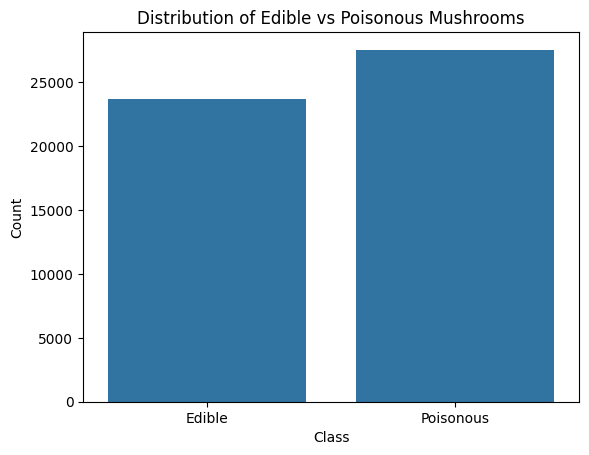

In [38]:
sns.countplot(data=df, x='class')
plt.title('Distribution of Edible vs Poisonous Mushrooms')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Edible', 'Poisonous'])
plt.show()

**This plot shows us the balance between the edible and poisonous mushrooms**

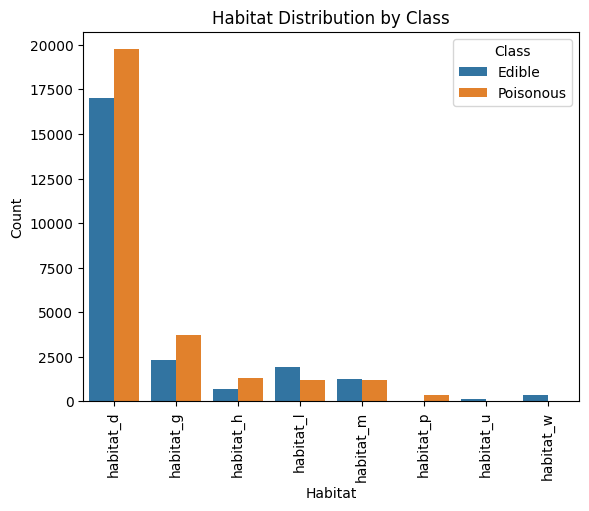

In [39]:
habitat_columns = [col for col in df.columns if 'habitat_' in col]
habitat_melted = df.melt(id_vars='class', value_vars=habitat_columns, var_name='Habitat', value_name='Count')
habitat_melted = habitat_melted[habitat_melted['Count'] == 1]

sns.countplot(x='Habitat', hue='class', data=habitat_melted)
plt.title('Habitat Distribution by Class')
plt.xlabel('Habitat')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Class', labels=['Edible', 'Poisonous'])
plt.show()

**This plot shows the distribution of mushrooms in different habitats within each class. Additionaly, we can see that most of the mashrooms are in habitet_d.**

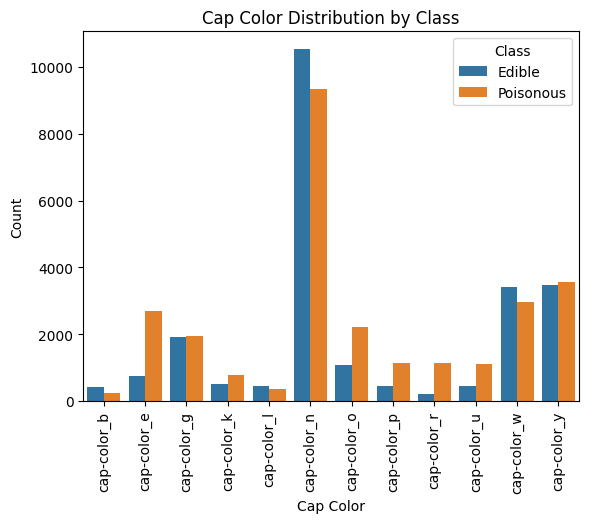

In [40]:
cap_color_columns = [col for col in df.columns if 'cap-color_' in col]
cap_color_melted = df.melt(id_vars='class', value_vars=cap_color_columns, var_name='Cap Color', value_name='Count')
cap_color_melted = cap_color_melted[cap_color_melted['Count'] == 1]

sns.countplot(x='Cap Color', hue='class', data=cap_color_melted)
plt.title('Cap Color Distribution by Class')
plt.xlabel('Cap Color')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Class', labels=['Edible', 'Poisonous'])
plt.show()

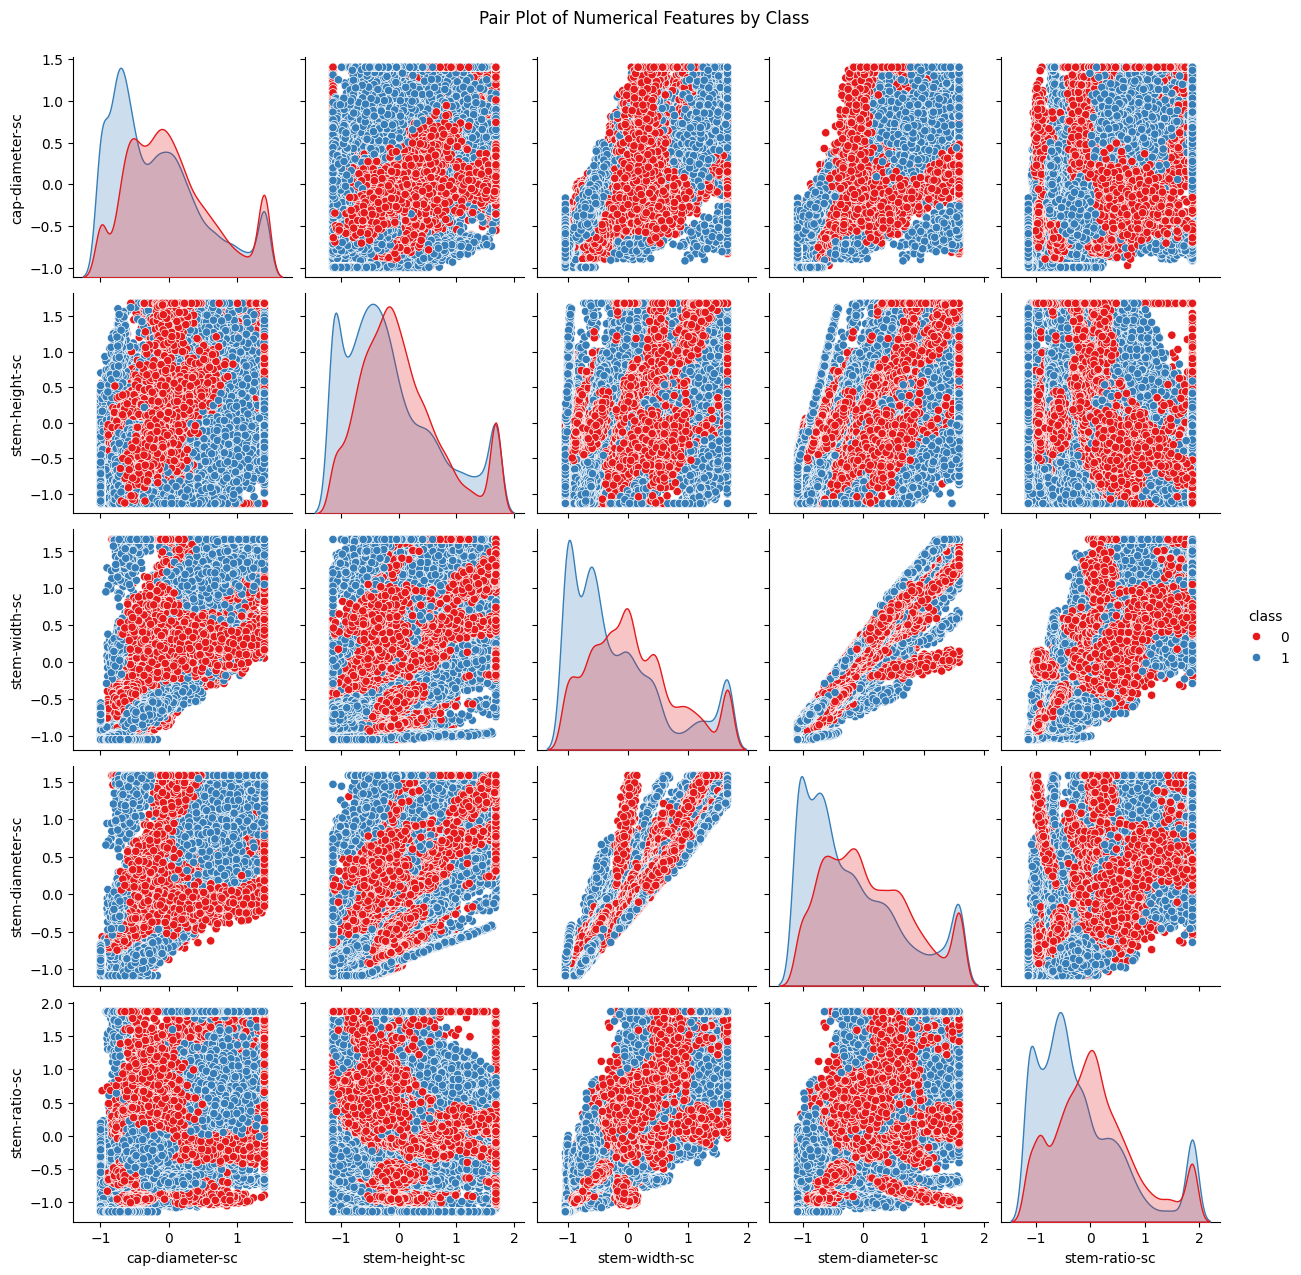

In [41]:
sns.pairplot(df[['cap-diameter-sc', 'stem-height-sc', 'stem-width-sc', 'stem-diameter-sc', 'stem-ratio-sc', 'class']], hue='class', palette='Set1')
plt.suptitle('Pair Plot of Numerical Features by Class', y=1.02)
plt.show()


**Now we can see that the new pair plots look like they are scaled, that is because the outliers were "cut".**

**if the points tend to form distinct clusters based on class, it indicates that there may be a relationship between those two variables and the target variable (class).
If the points are scattered randomly without any clear pattern or separation, it suggests that the variables may not have a strong relationship with each other or with the target variable.**

## 3. Machine Learning Models

## Evaluation
- Train Test Split
- K-fold cross-validation (CV)

## Algorithms
- Dummy
- Random Forest
- Support Vector Machine Classifier
- K-Nearest Neighbors Classifier
- AdaBoost Classifier
- Decision Tree Classifier

### Train Test Split

In [42]:
from sklearn.model_selection import train_test_split
y = df['class']
X = df.drop('class', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2)

**First we will use Dummy classifier to check how balanced is the dataset**

### Dummy Classifier

In [43]:
dummy = DummyClassifier(strategy = 'most_frequent')
dummy.fit(X,y)

DummyClassifier(strategy='most_frequent')

In [44]:
dummy_pred = dummy.predict(X)
dummy_pred[0] # printing one element to check which class is majority.

1

In [45]:
dummy.score(X,y)*100

53.79310344827586

**From the score of the dummy classifier we can see that the dataset is well balanced. Around 53 of the instances are poisonous and the rest 47 are edible**

### Random Forest

In [46]:
RF_tt = RandomForestClassifier(random_state = 1)
RF_tt.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

In [47]:
y_pred_rf_tt = RF_tt.predict(X_test)
print(y_pred_rf_tt)
rf_tt_score = RF_tt.score(X_test, y_test)
print("rf_tt accuracy: ", rf_tt_score)

[1 1 1 ... 1 0 1]
rf_tt accuracy:  0.9984371337032117


**Confusion Matrix**

In [48]:
def plot_cm(y_true, y_pred, cmap="Blues", figsize=(4, 4)):
    """
    Plot confusion matrix heatmap.

    Parameters:
        y_true (array-like): True labels.
        y_pred (array-like): Predicted labels.
        cmap (str, optional): Colormap for the heatmap. Defaults to 'Blues'.
    """
    cm = confusion_matrix(y_true, y_pred)

    plot_confusion_matrix(
        conf_mat=cm,
        show_absolute=True,
        show_normed=True,
        colorbar=True,
        cmap=cmap,
        figsize=figsize,
    )
    plt.show()

In [49]:
print(classification_report(y_test, y_pred_rf_tt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5847
           1       1.00      1.00      1.00      6950

    accuracy                           1.00     12797
   macro avg       1.00      1.00      1.00     12797
weighted avg       1.00      1.00      1.00     12797



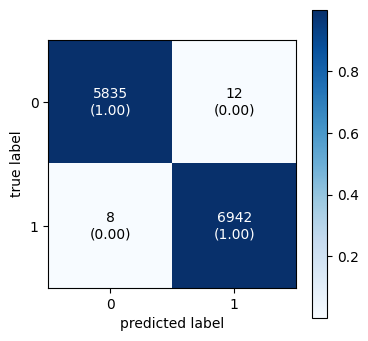

In [50]:
plot_cm(y_test, y_pred_rf_tt)

**From this confusion matrix we can see that this classificator predicted 5835 edible as edible and 12 of them as poisunous. It also predicted 6942 poisunous as such, and only 8 of them as edible.**

### Support Vector Machine Classifier

In [51]:
svm_tt = SVC()
svm_tt.fit(X_train, y_train)

SVC()

In [52]:
y_pred_svm_tt = svm_tt.predict(X_test)
print(y_pred_svm_tt)
svm_tt_score = svm_tt.score(X_test, y_test)
print("svm_tt accuracy: ", svm_tt_score)

[1 1 1 ... 1 0 1]
svm_tt accuracy:  0.9934359615534891


**Confusion Matrix**

In [53]:
print(classification_report(y_test, y_pred_svm_tt))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      5847
           1       0.99      1.00      0.99      6950

    accuracy                           0.99     12797
   macro avg       0.99      0.99      0.99     12797
weighted avg       0.99      0.99      0.99     12797



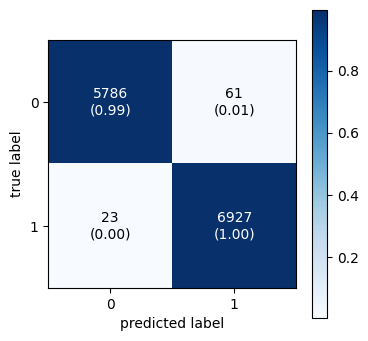

In [54]:
plot_cm(y_test, y_pred_svm_tt)

**From this confusion matrix we can see that this classificator predicted 5786 edible as edible and 61 of them as poisunous. It also predicted 6927 poisunous as such, and only 23 of them as edible.**

### K-Nearest Neighbors Classifier

In [55]:
knn_tt = KNeighborsClassifier(3)
knn_tt.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [56]:
y_pred_knn_tt = knn_tt.predict(X_test)
print(y_pred_knn_tt)
knn_tt_score = knn_tt.score(X_test, y_test)
print("knn_tt accuracy: ", knn_tt_score)

[1 1 1 ... 1 0 1]
knn_tt accuracy:  0.9976557005548176


In [57]:
print(classification_report(y_test, y_pred_knn_tt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5847
           1       1.00      1.00      1.00      6950

    accuracy                           1.00     12797
   macro avg       1.00      1.00      1.00     12797
weighted avg       1.00      1.00      1.00     12797



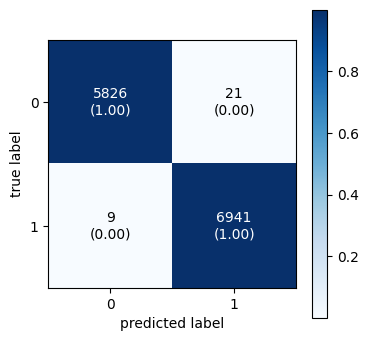

In [58]:
plot_cm(y_test, y_pred_knn_tt)

**From this confusion matrix we can see that this classificator predicted 5826 edible as edible and 21 of them as poisunous. It also predicted 6941 poisunous as such, and only 9 of them as edible**

### AdaBoost

In [59]:
adaboost_tt = AdaBoostClassifier(n_estimators=50, random_state=2)
adaboost_tt.fit(X_train, y_train)
y_pred_ada_tt= adaboost_tt.predict(X_test)
adaboost_tt_score = adaboost_tt.score(X_test, y_test)
print("adaboost_tt accuracy: ", adaboost_tt_score)

adaboost_tt accuracy:  0.7744002500586075


In [60]:
print(classification_report(y_test, y_pred_ada_tt))

              precision    recall  f1-score   support

           0       0.74      0.78      0.76      5847
           1       0.80      0.77      0.79      6950

    accuracy                           0.77     12797
   macro avg       0.77      0.77      0.77     12797
weighted avg       0.78      0.77      0.77     12797



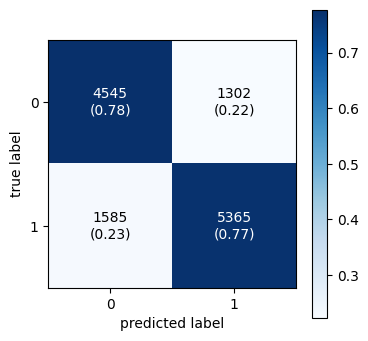

In [61]:
plot_cm(y_test, y_pred_ada_tt)

### Decision Tree Classifier

In [62]:
dt_tt = DecisionTreeClassifier(max_depth=5)
dt_tt.fit(X_train, y_train)
y_pred_dt_tt= dt_tt.predict(X_test)
dt_tt_score = dt_tt.score(X_test, y_test)
print("dt_tt accuracy: ", dt_tt_score)

dt_tt accuracy:  0.7139954676877394


              precision    recall  f1-score   support

           0       0.66      0.78      0.71      5847
           1       0.78      0.66      0.71      6950

    accuracy                           0.71     12797
   macro avg       0.72      0.72      0.71     12797
weighted avg       0.73      0.71      0.71     12797



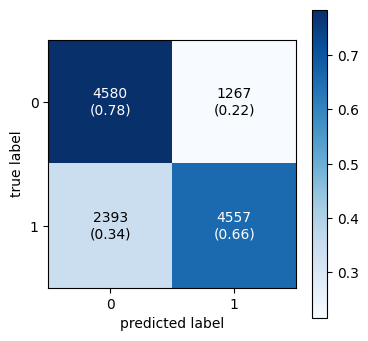

In [63]:
print(classification_report(y_test, y_pred_dt_tt))
plot_cm(y_test, y_pred_dt_tt)

**From the scores of each algorithm, we can see that all the algorithms got better when we handled the missing values, as well as one hot encoding the input data. Aditionally after standardization SVM had a hude increase in accuracy. However, AdaBoost achived only 77% accuracy and Decision Tree only achived 71% accuracy, therefor, we will try to increase the score by using diffrent evaluation techniques and hyperparameter optimizing.**

### K-fold cross-validation (CV)

In [64]:
RF_kf = RandomForestClassifier(random_state = 1)
svm_kf = SVC()
knn_kf = KNeighborsClassifier(3)
ada_kf = AdaBoostClassifier(n_estimators=50, random_state=2)
dt_kf = DecisionTreeClassifier(max_depth = 5)

kf = KFold(n_splits=10, shuffle=True)

rf_kf_score = cross_val_score(RF_kf, X, y, cv = kf, scoring="accuracy")
svm_kf_score = cross_val_score(svm_kf, X, y, cv = kf, scoring="accuracy")
knn_kf_score = cross_val_score(knn_kf, X, y, cv = kf, scoring="accuracy")
ada_kf_score = cross_val_score(ada_kf, X, y, cv = kf, scoring="accuracy")
dt_kf_score = cross_val_score(dt_kf, X, y, cv = kf, scoring="accuracy")

In [65]:
print(np.mean(rf_kf_score), np.mean(svm_kf_score), np.mean(knn_kf_score), np.mean(ada_kf_score), np.mean(dt_kf_score))

0.9985542677476527 0.9940216745329848 0.9980267522759039 0.7653218579519052 0.714761016834127


**We can see that K-Fold did't really increase our accuracy too much.**

## 4. Hyperparameter Optimization

In [66]:
dtc_h = DecisionTreeClassifier() 
ada_h = AdaBoostClassifier(base_estimator=dtc_h)
ada_h.fit(X_train,y_train)

y_pred_ada_h = ada_h.predict(X_test)


**For AdaBoost Classifier we will tune the number of estimators and the learning rate parameters, as a base estimator we will use Decision Tree Classifier.**

In [67]:
parameters = {
    'n_estimators' : [50, 70, 90, 120, 180, 200],
    'learning_rate' : [0.001, 0.01, 0.1, 1, 10]
}

grid_search = GridSearchCV(ada_h, parameters, n_jobs = -1, cv = 5, verbose = 1)
grid_search.fit(X_train, y_train)


grid_search.best_params_

Fitting 5 folds for each of 30 candidates, totalling 150 fits


/home/angela/apps/mamba/envs/AI/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/home/angela/apps/mamba/envs/AI/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/home/angela/apps/mamba/envs/AI/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/home/angela/apps/mamba/envs/AI/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/home/angela/apps/mamba/envs/AI/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in ve

{'learning_rate': 1, 'n_estimators': 180}

In [68]:
dtc_h = DecisionTreeClassifier() 
ada_h = AdaBoostClassifier(base_estimator=dtc_h,learning_rate= 10, n_estimators= 50) 

ada_h.fit(X_train,y_train)

y_pred_ada_h = ada_h.predict(X_test)

print(classification_report(y_test,y_pred_ada_h))
ada_h_score = ada_h.score(X_test, y_test)
print("ada_h accuracy: ", ada_h_score)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5847
           1       0.99      0.99      0.99      6950

    accuracy                           0.99     12797
   macro avg       0.99      0.99      0.99     12797
weighted avg       0.99      0.99      0.99     12797

ada_h accuracy:  0.9935922481831679


**For the Decision Tree we will be tuning the criterion, max_depth, min_samples_split and min_samples_leaf parameters.**

In [69]:
dt_h = DecisionTreeClassifier(random_state = 42) 
dt_h.fit(X_train, y_train)

y_pred_dt_h = dt_h.predict(X_test)

In [70]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid_search = GridSearchCV(dt_h, param_grid, n_jobs = -1, cv = 5, verbose = 1)
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 5 folds for each of 72 candidates, totalling 360 fits


{'criterion': 'entropy',
 'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 5}

In [71]:
dt_h = DecisionTreeClassifier(criterion = 'entropy',max_depth = None,min_samples_leaf = 1,min_samples_split = 5) 

dt_h.fit(X_train,y_train)

y_pred_dtc_h = dt_h.predict(X_test)

print(classification_report(y_test,y_pred_dtc_h))
dt_h_score = dt_h.score(X_test, y_test)
print("dtc_h accuracy: ", dt_h_score)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5847
           1       0.99      0.99      0.99      6950

    accuracy                           0.99     12797
   macro avg       0.99      0.99      0.99     12797
weighted avg       0.99      0.99      0.99     12797

dtc_h accuracy:  0.9935141048683285


**With the optimized parameters we managed to achive a very high accuracy of up to 99% for both of the classifiers.**

## 5. Conclusion

## Train-Test-Split Results

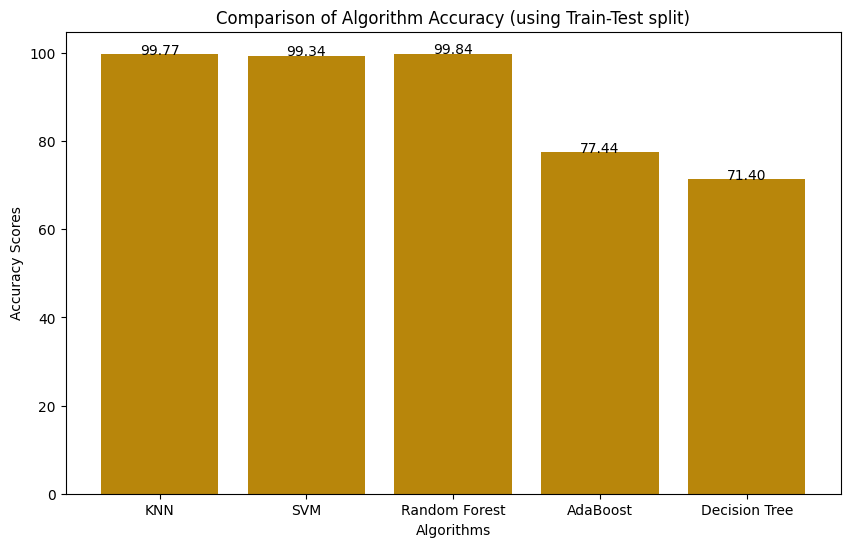

In [72]:
algorithms = ['KNN', 'SVM', 'Random Forest', 'AdaBoost', 'Decision Tree']

accuracy_scores_tt = [knn_tt_score*100, svm_tt_score*100, rf_tt_score*100, adaboost_tt_score*100, dt_tt_score*100]

plt.figure(figsize=(10, 6))
plt.bar(algorithms, accuracy_scores_tt, color='darkgoldenrod')

plt.title('Comparison of Algorithm Accuracy (using Train-Test split)')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy Scores')

for i, score in enumerate(accuracy_scores_tt):
    plt.text(i, score + 0.01, f'{score:.2f}', ha='center')

plt.show()

## K-Fold Results

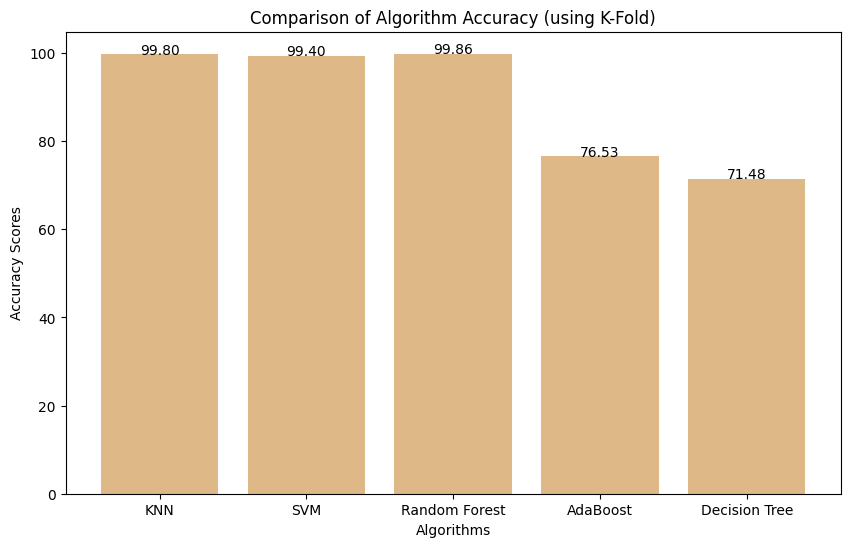

In [73]:
algorithms = ['KNN', 'SVM', 'Random Forest', 'AdaBoost', 'Decision Tree']

accuracy_scores_kf = [np.mean(knn_kf_score)*100, np.mean(svm_kf_score)*100, np.mean(rf_kf_score)*100, np.mean(ada_kf_score)*100, np.mean(dt_kf_score)*100]

plt.figure(figsize=(10, 6))
plt.bar(algorithms, accuracy_scores_kf, color='burlywood')

plt.title('Comparison of Algorithm Accuracy (using K-Fold)')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy Scores')

for i, score in enumerate(accuracy_scores_kf):
    plt.text(i, score + 0.01, f'{score:.2f}', ha='center')

plt.show()

## Hyperparameter Optimization Results

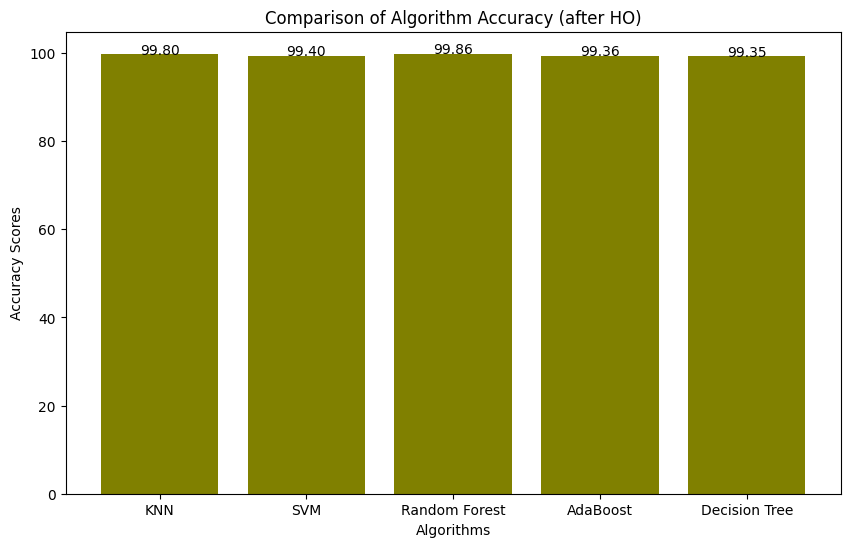

In [75]:
algorithms = ['KNN', 'SVM', 'Random Forest', 'AdaBoost', 'Decision Tree']

accuracy_scores_kf_ho = [np.mean(knn_kf_score)*100, np.mean(svm_kf_score)*100, np.mean(rf_kf_score)*100, ada_h_score*100, dt_h_score*100]

plt.figure(figsize=(10, 6))
plt.bar(algorithms, accuracy_scores_kf_ho, color='olive')

plt.title('Comparison of Algorithm Accuracy (after HO)')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy Scores')

for i, score in enumerate(accuracy_scores_kf_ho):
    plt.text(i, score + 0.01, f'{score:.2f}', ha='center')

plt.show()

**With all the preprocessing we have done, as well hyperparameter optimization and feature engeneering, we achived high accuracy for all of the algorithms.** 